# Section A - Luke Kennedy
---

1.<a href='#importingpackages'>Importing Data and used Packages</a>

2.<a href='#unique'>Finding Number of Unique Artists</a>

3.<a href='#word'>Finding Most Common Word</a>

4.<a href='#focean'>Finding Average Frank Ocean Song</a>

5.<a href='#popjump'>Finding Largest Absolute Popularity Jump</a>

6.<a href='#genre'>Finding Optimal Number of Genres</a>

7.<a href='#trend'>Plotting Graphs of Trends in the Music Industry</a>

## Importing the Data and Packages

Data reads in successfully, all data types are similar to expected. Notably, release date is an object when it should probably be a datetime so when I come to deal with that column I need to make sure to convert it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luke\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luke\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
spotify_data = pd.read_csv("data.csv")
spotify_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
spotify_data.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

## Finding the Number of Unique Artists

Since songs often had multiple artists and the artist data was stored as one long string I had to manually separate each artist in that string by splitting at the ", " that was inbetween each artist. I also removed the square brackets around each artist but left the speech marks in as they would be the same for every instance of the artist. I found there to be 32735 artists in the data set.

In [4]:
#Initially getting rid of all obvious artist duplicates
artists = (pd.unique(spotify_data["artists"]))

#For each unique entry of artists I remove the brackets surrounding the names and split each artists entry up into a list of names
artists_clean = []
for i in artists:
    x = i.replace("[","")
    x = x.replace("]","")
    x = x.split(", ")
#Once I have the list of names I add each name on to a new list
    artists_clean.extend(x)

#I can then take each unique value of this list to find all the unique artists
artists_clean = pd.unique(artists_clean)
num_artists = len(artists_clean)
print("There are", num_artists,"unique artists.")

There are 32735 unique artists.


## Finding the Most Common Words

Song titles in general have a lot of stop words in them that don't contribute at all to the meaning. In addition to English stopwords this dataset had many other languages in it that I also had to account for. I used NLTK to produce this list of stopwords and added any music specific ones or non-sensical ones that appeared commonly e.g op meaning opus number for classical or feat for featuring.

I got each of the titles and tokenized them using NLTK, made all the words lowercase and checked they were not a 1 letter word or in the stopwords and if not added them to a list.

From there, I could make a frequency distribution using NLTK and a wordcloud to show the most popular words, unsurprisingly the most popular was "love", followed by "year", and "new".

In [5]:
stopwords = []
stopwords.extend(nltk.corpus.stopwords.words('english'))
stopwords.extend(nltk.corpus.stopwords.words('french'))
stopwords.extend(nltk.corpus.stopwords.words('spanish'))
stopwords.extend(nltk.corpus.stopwords.words('russian'))
stopwords.extend(nltk.corpus.stopwords.words('german'))
stopwords.extend(["'s", "n't","''","``","'m","remaster","remastered","remasterizado","mix","feat","live","remix","op","часть","version","major","minor","chapter","ii","iii","original","allegro","take 1","take 2","take 3","take 4", "i.","'ll","'re","act","na","ca",".k"])

In [6]:
title_tokens = []

for title in spotify_data["name"]:    
    title_tokens.extend(nltk.word_tokenize(title))

In [7]:
title_tokens = [word.lower() for word in title_tokens]
title_tokens = [word for word in title_tokens if word not in stopwords and len(word) > 1]
fdist = nltk.FreqDist(title_tokens)

In [8]:
for word, frequency in fdist.most_common(25):
    print(u'{} - {}'.format(word, frequency))

love - 5661
year - 2438
new - 1922
take - 1839
blues - 1709
years - 1691
time - 1676
song - 1605
night - 1602
one - 1550
little - 1479
christmas - 1461
kapitel - 1328
instrumental - 1286
like - 1274
go - 1232
baby - 1224
got - 1192
let - 1192
get - 1159
2015 - 1140
piano - 1117
good - 1094
day - 1085
girl - 1050


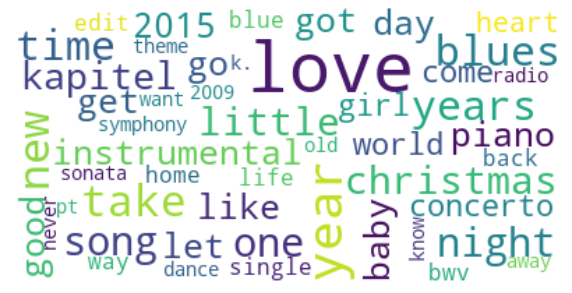

In [9]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate_from_frequencies(fdist)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Finding the Average Frank Ocean Song

I started off by just putting every solo Frank Ocean song into a dataframe by itself. From there I took the most appropriate average for each quantity and then created a dataframe with just the average Frank Ocean song entry.

For most quantities the appropriate average was the mean but where quantities were unstandardized e.g Tempo, Loudness, Duration and could be affected by large outliers I used the mean. For quantities that were categorical e.g Explicit, Mode, Key, and Year  / Release Date I took the modal average.

In [10]:
frank_ocean_df = spotify_data.iloc[lambda spotify_data: spotify_data["artists"].values == "['Frank Ocean']"]

In [11]:
avg_frank_ocean = {"acousticness":  [],       
                   "danceability": [], 
                   "duration_ms": [], 
                   "energy": [], 
                   "explicit": [], 
                   "instrumentalness": [], 
                   "key": [], 
                   "liveness": [], 
                   "loudness": [], 
                   "mode": [], 
                   "popularity": [],
                   "release_date": [],
                   "speechiness": [], 
                   "tempo": [], 
                   "valence": [], 
                   "year": []        
                  }

In [12]:
avg_frank_ocean["acousticness"]=frank_ocean_df["acousticness"].mean()
avg_frank_ocean["danceability"]=frank_ocean_df["danceability"].mean()
avg_frank_ocean["duration_ms"]=frank_ocean_df["duration_ms"].mean()
avg_frank_ocean["energy"]=frank_ocean_df["energy"].mean()
avg_frank_ocean["explicit"]=frank_ocean_df["explicit"].mode()
avg_frank_ocean["instrumentalness"]=frank_ocean_df["instrumentalness"].mean()
avg_frank_ocean["key"]=frank_ocean_df["key"].mode()
avg_frank_ocean["liveness"]=frank_ocean_df["liveness"].mean()
avg_frank_ocean["loudness"]=frank_ocean_df["loudness"].mean()
avg_frank_ocean["mode"]=frank_ocean_df["mode"].mode()
avg_frank_ocean["popularity"]=frank_ocean_df["popularity"].mean()
avg_frank_ocean["release_date"]=frank_ocean_df["release_date"].mode()
avg_frank_ocean["speechiness"]=frank_ocean_df["speechiness"].mean()
avg_frank_ocean["tempo"]=frank_ocean_df["tempo"].mean()
avg_frank_ocean["loudness"]=frank_ocean_df["loudness"].mean()
avg_frank_ocean["valence"]=frank_ocean_df["valence"].mean()
avg_frank_ocean["year"]=frank_ocean_df["year"].median()

In [13]:
avg_frank_ocean= pd.DataFrame(avg_frank_ocean)
avg_frank_ocean

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
0,0.531716,0.533029,209662.142857,0.469589,0,0.071315,0,0.232169,-10.016057,1,65.742857,2016-08-20,0.15154,111.325743,0.415131,2016.0


## Finding the Artist with Largest Subsequent Popularity Jump

I found this by simply iterating through all the unique artists in the dataframe, finding all the songs of that artist, sorting their releases by date and finding the largest jump in popularity in their releases and seeing if that was greater than the previously found maximum jump.

This does take a few minutes to run mostly due to how much data is being processed, I attempted to try and dynamically remove all the results I'd found so far but that ended up taking longer. I assume this is because it only deleted a few rows so the time taken to remake the dataframe was much larger than the time saved. In future, I could implement a check so when a quarter of the artists have been checked then delete the already searched rows so it only has to delete three times and each time a substantial gain in performance could be had.

I found the answer to be KAROL G with an absolute jump of 93.

In [14]:
max_artist = str
max_jump = 0

spotify_temp_data = spotify_data
sorted_artists = pd.unique(spotify_data["artists"])
sorted_artists.sort()
spotify_temp_data = spotify_temp_data.sort_values(by = "artists")
spotify_temp_data = spotify_temp_data.reset_index(drop=True)

for i in sorted_artists:

    temp_df = spotify_temp_data.loc[spotify_temp_data["artists"].values == i]
    temp_df["release_date"] = pd.to_datetime(temp_df["release_date"])
    temp_df = temp_df.sort_values(by = "release_date", ascending=False)
    pop_array = []
    for j in pd.unique(temp_df["release_date"]):
        date_i = temp_df.iloc[lambda temp_df: temp_df["release_date"].values == j]
        pop_array.append(np.max(date_i["popularity"].values))
    for k in range(0, len(pop_array)):
        if k+1 == len(pop_array):
            break
        else:
            if abs(pop_array[k] - pop_array[k+1]) > max_jump:
                max_jump = abs(pop_array[k] - pop_array[k+1])
                max_artist = temp_df["artists"].values[0]
    
print("Artist with max jump is:",max_artist)
print("Maximum jump of said artist is:",max_jump)

<ipython-input-14-919980aa17a7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["release_date"] = pd.to_datetime(temp_df["release_date"])


Artist with max jump is: ['KAROL G']
Maximum jump of said artist is: 93


## Using KMeans Clustering to Find Optimum Number of Genres

Before jumping straight into clustering I first scaled my data and performed principle component analysis on it. 

I scaled as the KMeans clustering uses a distance based measurement so all values needed to be on the same scale for the clustering to work correctly. I also used PCA as can be shown, several of the components did not explain much of the variance at all so removing these would both prevent overfitting and increase the speed of fitting.

I then used a knee locator to find the maximum point of curvature on the graph of "within cluster sum of squares" and the number of clusters used. The within cluster sum of squares is the sum of the squares of the distances of each element to the centroid of its respective cluster. This point of maximum curvature will be the optimum number of clusters.

I find the optimal number of clusters using this method to be 7 and plot a few graphs of the principle components against each other illustrating the clusters of the datapoints with different colours.

In [15]:
#Removing categories I deem not helpful for categorisation (release date is debatable but I am leaving it out for now and including release year)
genre_data = spotify_data.drop(["artists", "id", "key", "name", "release_date"], axis=1)

In [16]:
#Splitting features into binary and continuous features
binary_genres = genre_data[["explicit", "mode"]]
cont_genres = genre_data.drop(["explicit", "mode"], axis =1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cont_genres)
cont_genres_data = scaler.transform(cont_genres)
cont_genres_scaled = pd.DataFrame(data=cont_genres_data, columns=["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "popularity", "speechiness","tempo","valence","year"])
df_preproc = pd.concat([cont_genres_scaled, binary_genres], axis=1)
df_preproc

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year,explicit,mode
0,1.294358,0.347919,-0.434495,-0.948791,-0.588004,0.930106,-0.154111,-0.626050,-0.066549,1.089753,0.413903,-2.120635,0,0
1,0.378411,1.790898,-0.556689,0.125710,-0.510657,-0.721489,0.788862,-0.854645,-0.287113,-0.995485,1.608718,-2.120635,0,0
2,1.299622,0.626289,-0.464860,-1.088146,-0.589511,1.705763,-0.060991,-0.991803,0.374580,-0.641450,0.621861,-2.120635,0,1
3,-1.313529,1.097814,1.275491,1.156204,1.804534,-0.460536,0.780077,-0.397454,-0.346918,0.363273,-1.823729,-2.120635,0,1
4,-0.537536,0.950107,-0.455446,0.822485,-0.588829,1.057535,1.004092,-1.083241,-0.158725,0.167564,-0.852753,-2.120635,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,-1.289849,1.450037,-0.574108,1.405576,-0.589385,-0.183516,1.170478,-1.174679,-0.384776,0.296340,-1.280013,1.595750,0,0
174385,0.778480,-0.612173,-0.593617,-0.996465,-0.589564,-0.083788,0.015086,-1.174679,-0.382582,-0.736975,-1.121208,1.632914,0,1
174386,0.807432,0.762634,-0.098811,0.389751,2.160212,-0.543642,-0.112822,-1.174679,-0.425378,-0.295778,0.716387,1.595750,0,0
174387,1.107484,-0.424699,0.075406,-0.890115,-0.589564,-0.543642,-0.057301,1.979941,-0.373254,1.795212,-0.773351,1.632914,1,1


Variance explained by component 1 = 0.291
Variance explained by component 2 = 0.142
Variance explained by component 3 = 0.0956
Variance explained by component 4 = 0.0862
Variance explained by component 5 = 0.0799
Variance explained by component 6 = 0.0722
Variance explained by component 7 = 0.0659
Variance explained by component 8 = 0.0514
Variance explained by component 9 = 0.0359
Variance explained by component 10 = 0.028
Variance explained by component 11 = 0.0218
Variance explained by component 12 = 0.0167
Variance explained by component 13 = 0.0099
Variance explained by component 14 = 0.00395


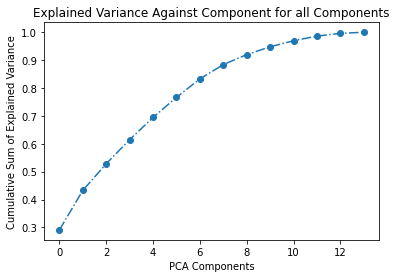

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_preproc)
evr = pca.explained_variance_ratio_
for i in range(0, len(evr)):
    print("Variance explained by component", i+1, "= {0:.3g}".format(evr[i]))
plt.plot(list(range(0,len(evr))),evr.cumsum(), marker = "o", linestyle = "-.")
plt.ylabel("Cumulative Sum of Explained Variance")
plt.xlabel("PCA Components")
plt.title("Explained Variance Against Component for all Components")
plt.show()

Variance explained by component 1 = 0.291
Variance explained by component 2 = 0.142
Variance explained by component 3 = 0.0956
Variance explained by component 4 = 0.0862
Variance explained by component 5 = 0.0799
Variance explained by component 6 = 0.0722
Variance explained by component 7 = 0.0659


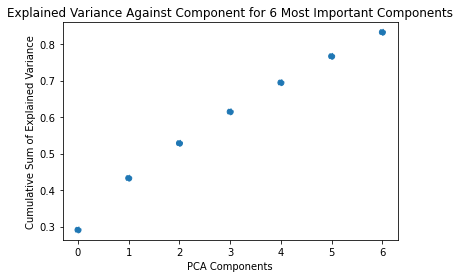

In [19]:
pca_new = PCA(7)
pca_new.fit(df_preproc)
evr_new = pca_new.explained_variance_ratio_
for i in range(0, len(evr_new)):
    print("Variance explained by component", i+1, "= {0:.3g}".format(evr_new[i]))
plt.scatter(list(range(0,len(evr_new))),evr_new.cumsum(), marker = "o", linestyle = "-.")
plt.ylabel("Cumulative Sum of Explained Variance")
plt.xlabel("PCA Components")
plt.title("Explained Variance Against Component for 6 Most Important Components")
plt.show()

pca_data = pca_new.transform(df_preproc)

In [20]:
from sklearn.cluster import KMeans

[[ 1.55647658 -1.51773858  0.6589386  ... -1.06817349  0.07885892
   1.24754307]
 [ 0.17209067 -2.66116969 -0.95972667 ...  0.55305683 -1.61526407
   0.64605744]
 [ 1.92659129 -2.05934971  1.13622894 ... -0.77501083 -1.3550153
   0.85099838]
 ...
 [ 0.15727195  0.22399587 -0.56147835 ...  1.72122908 -0.67330876
  -1.50266413]
 [-0.5440535   1.31145084 -1.19252217 ... -1.31648963  1.88405305
   0.71521096]
 [-0.36132423  0.14570962 -0.07795625 ...  1.61431559 -0.54003051
  -1.73907229]]
[[ 1.55647658 -1.51773858  0.6589386  ... -1.06817349  0.07885892
   1.24754307]
 [ 0.17209067 -2.66116969 -0.95972667 ...  0.55305683 -1.61526407
   0.64605744]
 [ 1.92659129 -2.05934971  1.13622894 ... -0.77501083 -1.3550153
   0.85099838]
 ...
 [ 0.15727195  0.22399587 -0.56147835 ...  1.72122908 -0.67330876
  -1.50266413]
 [-0.5440535   1.31145084 -1.19252217 ... -1.31648963  1.88405305
   0.71521096]
 [-0.36132423  0.14570962 -0.07795625 ...  1.61431559 -0.54003051
  -1.73907229]]
[[ 1.55647658 -1.5

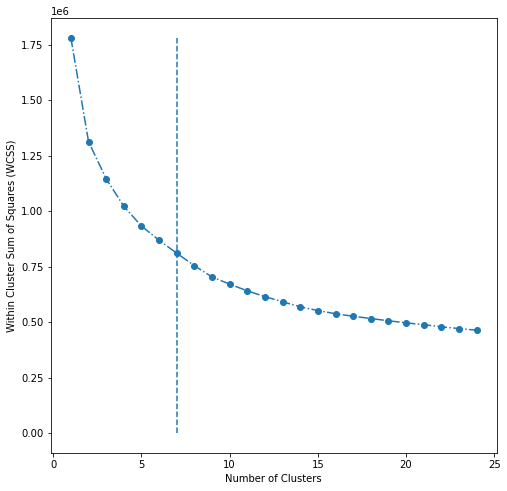

Ideal Number of Clusters = 7


In [21]:
from kneed import KneeLocator

# get within cluster sum of squares for each value of k
wcss = []
max_clusters = 25
for i in range(1, max_clusters):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state=23)
    print(pca_data)
    kmeans_pca.fit(pca_data)
    wcss.append(kmeans_pca.inertia_)
      
# programmatically locate the elbow
best_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee

    
# visualize the curve in order to locate the elbow
plt.figure(figsize=(8,8))
plt.plot(range(1, 25), wcss, marker='o', linestyle='-.')
plt.vlines(best_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.show()

print("Ideal Number of Clusters =", best_clusters)

In [22]:
kmeans_final = KMeans(n_clusters = 7, init='k-means++', random_state=23)
kmeans_final.fit(pca_data)
labels  = kmeans_final.predict(pca_data)

In [23]:
df_clustered = pd.concat([spotify_data["artists"],spotify_data["name"], pd.DataFrame(pca_data)], axis=1)
df_clustered['Cluster'] = kmeans_final.labels_

x = df_clustered[0]
y = df_clustered[1]
z = df_clustered[2]
q = df_clustered[3]

df_clustered

,artists,name,0,1,2,3,4,5,6,Cluster
0,['Mamie Smith'],Keep A Song In Your Soul,1.556477,-1.517739,0.658939,-1.060136,-1.068173,0.078859,1.247543,6
1,"[""Screamin' Jay Hawkins""]",I Put A Spell On You,0.172091,-2.661170,-0.959727,-0.808546,0.553057,-1.615264,0.646057,6
2,['Mamie Smith'],Golfing Papa,1.926591,-2.059350,1.136229,-0.086242,-0.775011,-1.355015,0.850998,6
3,['Oscar Velazquez'],True House Music - Xavier Santos & Carlos Gomi...,-0.087331,0.936622,0.596931,-0.892989,2.079876,0.139434,-0.176175,1
4,['Mixe'],Xuniverxe,-0.146202,-1.010758,1.414293,-0.426123,-0.327750,-0.612635,0.140207,6
...,...,...,...,...,...,...,...,...,...,...
174384,"['DJ Combo', 'Sander-7', 'Tony T']",The One,-2.191604,0.216991,0.248745,0.068041,0.458333,0.146414,-1.212270,3
174385,['Alessia Cara'],A Little More,0.899367,0.836001,-0.311902,0.712071,-0.738531,-0.254662,-0.612748,2
174386,['Roger Fly'],Together,0.157272,0.223996,-0.561478,-1.399507,1.721229,-0.673309,-1.502664,6
174387,['Taylor Swift'],champagne problems,-0.544053,1.311451,-1.192522,0.430319,-1.316490,1.884053,0.715211,2


c:\Users\luke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


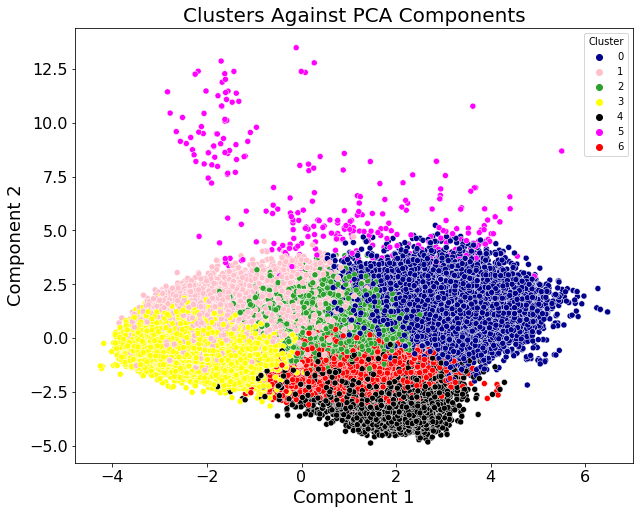

In [24]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_clustered['Cluster'], palette = ['darkblue', 'pink', 'tab:green', 'yellow', 'black',"magenta","red"])
plt.title('Clusters Against PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

c:\Users\luke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


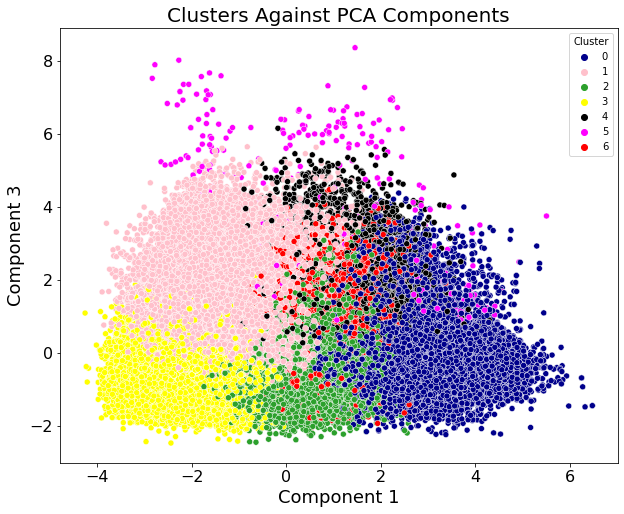

In [25]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, z, hue=df_clustered['Cluster'], palette = ['darkblue', 'pink', 'tab:green', 'yellow', 'black',"magenta","red"])
plt.title('Clusters Against PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 3", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

c:\Users\luke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


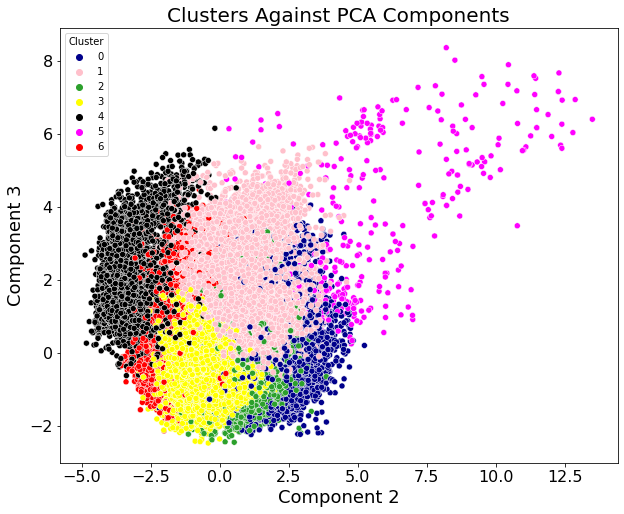

In [26]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(y, z, hue=df_clustered['Cluster'], palette = ['darkblue', 'pink', 'tab:green', 'yellow', 'black',"magenta","red"])
plt.title('Clusters Against PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 3", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

<Figure size 1440x1440 with 0 Axes>

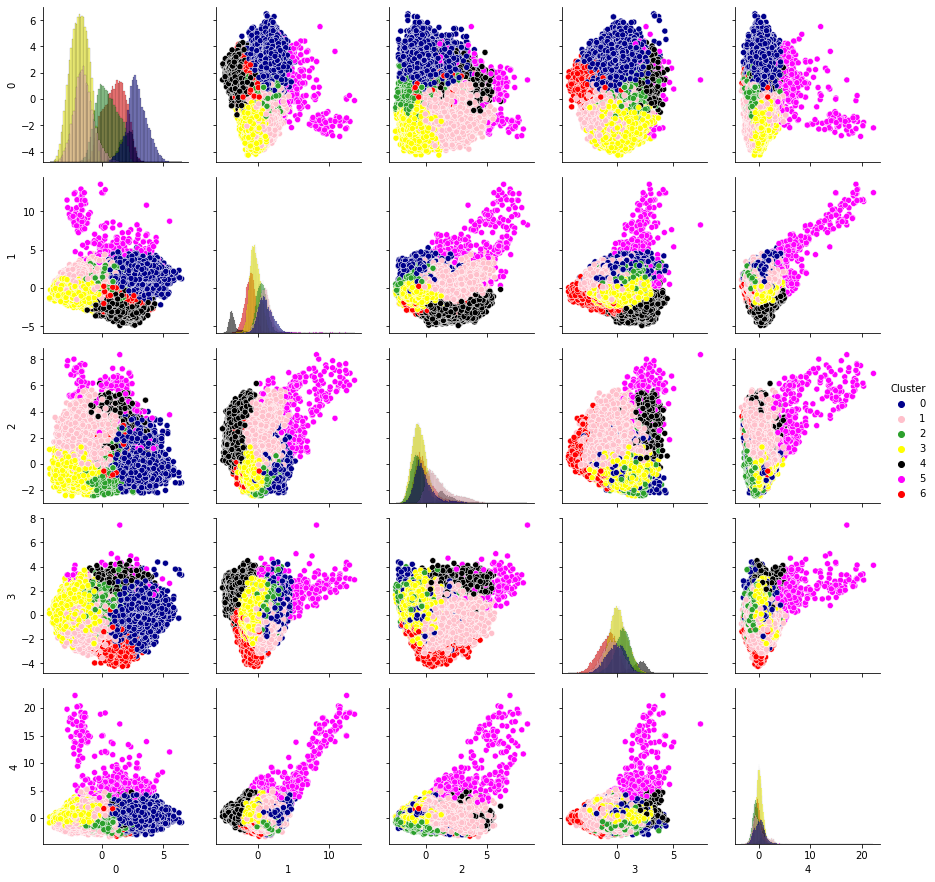

In [27]:
fig = plt.figure(figsize=(20, 20))
g = sns.PairGrid(df_clustered[[0,1,2,3,4,"Cluster"]], hue = "Cluster", palette = ['darkblue', 'pink', 'tab:green', 'yellow', 'black',"magenta","red"])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.savefig("Genres.png")
plt.show()

## Trends in the Music Industry Over The Last 5 Years

To gain some context, as just looking at trends from the last 5 years was not particularly informative. I also took a look at trends over the whole dataset, the last 30 years, and the last 6 years (essentially 5 since 2021 we don't have complete data for).

Unsurprisingly, 2021 has so far seen an incredible reduction in liveness compared to previous years most likely due to the pandemic.

Acousticness has in general been decreasing over the last 30 years but appears to be potentially increasing in the last 5 years and the decrease has definitely levelled off.

The average duration of songs is decreasing in the last 5 years and appears to be accelerating in that trend.

Valence appears to be decreasing, probably because life is not getting much happier and the new music is reflecting that.

Number of new songs is increasing and mean popularity of songs is decreasing, this could be due to the increasing availability of software that allows you to make music in your own home. Meaning that lots more independent artists are producing their own music, they are not well known so this results in the increase in content and decrease in mean popularity and probably explains the large number of zero popularity songs.

Speechiness is increasing, this could be due to the newer popularity of rap music or the increase in popularity of podcasts, both of which have low leveles of instruments and high amounts of vocal content.

In [28]:
years = range(1920,2022)

In [29]:
recent_years_df = {"acousticness":  [],
                                       "acousticness_stddev":  [],  
                                       "danceability": [], 
                                       "danceability_stddev":  [],
                                       "duration_ms": [], 
                                       "duration_stddev":  [],
                                       "energy": [],
                                       "energy_stddev":  [],
                                       "explicit": [],
                                       "explicit_stddev":  [],
                                       "instrumentalness": [], 
                                       "instrumentalness_stddev":  [],
                                       "key": [],
                                       "liveness": [], 
                                       "liveness_stddev":  [],
                                       "loudness": [],
                                       "loudness_stddev":  [],
                                       "mode": [],
                                       "mode_stddev":  [],
                                       "popularity": [],
                                       "popularity_stddev":  [],
                                       "speechiness": [], 
                                       "speechiness_stddev":  [],
                                       "tempo": [],
                                       "tempo_stddev":  [],
                                       "valence": [],
                                       "valence_stddev":  [],
                                       "count": []
                                      }
recent_years_df = pd.DataFrame(recent_years_df)

for i in years:
    index = []
    year_df = spotify_data.loc[spotify_data["year"].values == i]
    year_df.astype("float64", errors = "ignore")
    quantities_current_year = [year_df["acousticness"].mean(),
                           year_df["acousticness"].std(),
                           year_df["danceability"].mean(),
                           year_df["danceability"].std(),
                           year_df["duration_ms"].median(),
                           year_df["duration_ms"].std(),
                           year_df["energy"].mean(),
                           year_df["energy"].std(),
                           year_df["explicit"].sum(),
                           year_df["explicit"].std(),
                           year_df["instrumentalness"].mean(),
                           year_df["instrumentalness"].std(),
                           year_df["key"].mode(),
                           year_df["liveness"].mean(),
                           year_df["liveness"].std(),
                           year_df["loudness"].mean(),
                           year_df["loudness"].std(),
                           year_df["mode"].mode(),
                           year_df["mode"].std(),
                           year_df["popularity"].mean(),
                           year_df["popularity"].std(),
                           year_df["speechiness"].mean(),
                           year_df["speechiness"].std(),
                           year_df["tempo"].median(),
                           year_df["tempo"].std(),
                           year_df["valence"].mean(),
                           year_df["valence"].std(),
                           len(year_df["year"])]
 

    recent_years_df.loc[i] = quantities_current_year


c:\Users\luke\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [30]:
recent_years_df["years"] = years

In [31]:
all_years = recent_years_df

In [32]:
all_years

,acousticness,acousticness_stddev,danceability,danceability_stddev,duration_ms,duration_stddev,energy,energy_stddev,explicit,explicit_stddev,...,popularity,popularity_stddev,speechiness,speechiness_stddev,tempo,tempo_stddev,valence,valence_stddev,count,years
1920,0.631242,0.403621,0.515750,0.191663,195253.0,167005.242281,0.418700,0.228299,43.0,0.329149,...,0.610315,2.301301,0.082984,0.088689,115.9010,32.059488,0.498210,0.268052,349.0,1920
1921,0.862105,0.248359,0.432171,0.172900,188675.0,155393.316482,0.241136,0.155109,11.0,0.256834,...,0.391026,1.013291,0.078952,0.084534,99.3780,28.485110,0.378276,0.257349,156.0,1921
1922,0.828934,0.197215,0.575620,0.144656,142700.0,39770.546361,0.226173,0.112411,0.0,0.000000,...,0.090909,0.707107,0.464368,0.423779,88.4120,31.566768,0.571190,0.159422,121.0,1922
1923,0.957247,0.114522,0.577341,0.134123,179667.0,29326.141047,0.262406,0.134100,0.0,0.000000,...,5.205405,7.539099,0.093949,0.096935,109.7900,32.990113,0.625492,0.193691,185.0,1923
1924,0.940200,0.153458,0.549894,0.151047,173786.5,90341.559530,0.344347,0.151598,0.0,0.000000,...,0.661017,1.905068,0.092089,0.082843,117.8880,38.625847,0.663725,0.196449,236.0,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.207413,0.287968,0.580475,0.183299,216271.0,173709.025054,0.686392,0.229292,484.0,0.417343,...,31.662338,32.127344,0.096717,0.097005,125.9905,27.431059,0.436313,0.248853,2156.0,2017
2018,0.233836,0.305522,0.602731,0.167154,210937.5,144886.063151,0.659552,0.227194,652.0,0.427305,...,27.599484,32.085145,0.121045,0.155158,127.7900,27.564154,0.426566,0.244348,2714.0,2018
2019,0.261344,0.304621,0.603101,0.175641,207320.0,162125.128972,0.629781,0.231244,548.0,0.424274,...,32.346930,32.424626,0.106820,0.122911,123.0280,27.728158,0.457813,0.243651,2329.0,2019
2020,0.202303,0.285260,0.605285,0.170268,206566.5,120158.678654,0.674247,0.228683,753.0,0.380320,...,24.064741,30.118641,0.100629,0.103757,126.9910,25.525258,0.468030,0.256424,4294.0,2020


In [33]:
recent_years_df = all_years.loc[range(1990,2022)]
five_years_df = recent_years_df.loc[range(2016,2021)]
six_years_df = recent_years_df.loc[range(2016,2022)]
twentytwentyone_df = recent_years_df.loc[2021]

In [34]:
recent_years_df

,acousticness,acousticness_stddev,danceability,danceability_stddev,duration_ms,duration_stddev,energy,energy_stddev,explicit,explicit_stddev,...,popularity,popularity_stddev,speechiness,speechiness_stddev,tempo,tempo_stddev,valence,valence_stddev,count,years
1990,0.343075,0.336532,0.533510,0.180682,244113.0,100692.639221,0.565779,0.269924,83.0,0.199113,...,40.168327,9.892826,0.064080,0.074460,115.5305,30.438844,0.525797,0.270550,2008.0,1990
1991,0.345380,0.332249,0.555551,0.181334,228840.0,83312.778187,0.554201,0.252507,120.0,0.231087,...,38.951909,13.191712,0.070238,0.077178,115.3670,30.472372,0.559973,0.266796,2121.0,1991
1992,0.334324,0.323030,0.555135,0.176839,233653.0,93291.210374,0.574860,0.251792,169.0,0.277702,...,42.455179,9.534820,0.072315,0.078517,118.2320,32.153476,0.558718,0.259897,2008.0,1992
1993,0.320281,0.321713,0.569726,0.189610,234953.5,91307.760973,0.550039,0.241672,167.0,0.275829,...,42.348064,9.972366,0.076870,0.094736,115.7560,31.094728,0.555559,0.269156,2014.0,1993
1994,0.321046,0.330359,0.549706,0.187648,240480.0,90939.296174,0.567885,0.258211,266.0,0.338301,...,44.421991,9.866564,0.075206,0.085771,113.2760,31.065156,0.524013,0.271253,2019.0,1994
1995,0.317051,0.317933,0.559848,0.189818,240000.0,90460.659422,0.567858,0.253030,273.0,0.343332,...,44.221889,9.048964,0.082174,0.100219,112.7750,32.405985,0.529819,0.269629,2001.0,1995
1996,0.309511,0.311301,0.587786,0.170704,241027.0,130306.893262,0.579875,0.236685,310.0,0.360452,...,44.019792,9.785906,0.085968,0.099890,112.2490,30.948485,0.560785,0.254728,2021.0,1996
1997,0.312734,0.322061,0.574223,0.180302,241493.0,94697.142736,0.596707,0.250999,250.0,0.328902,...,44.645782,9.311959,0.089756,0.113834,112.2140,30.911784,0.545356,0.264880,2027.0,1997
1998,0.301001,0.317621,0.580688,0.180068,242586.5,83928.506622,0.599213,0.249465,316.0,0.362336,...,44.854966,10.166935,0.088892,0.105777,112.9920,30.317997,0.529285,0.265833,2034.0,1998
1999,0.286313,0.311797,0.581506,0.182064,232760.0,89479.569923,0.628066,0.244018,337.0,0.368915,...,45.240000,11.821284,0.093549,0.110011,113.7600,31.508703,0.553063,0.263069,2075.0,1999


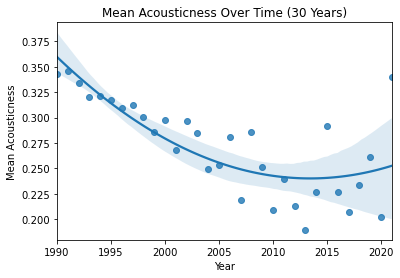

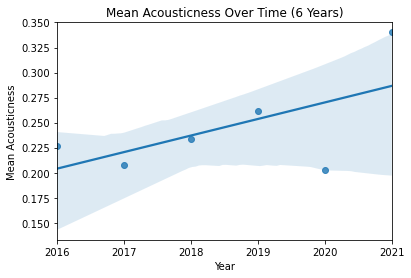

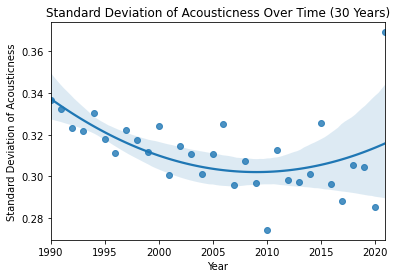

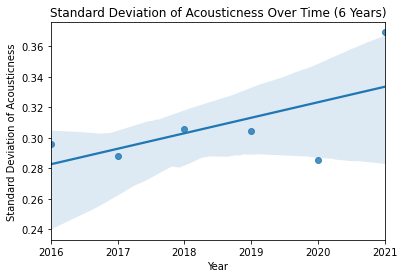

In [35]:
sns.regplot(data=recent_years_df, x="years", y="acousticness", scatter = True, fit_reg = True, order = 2)
plt.xlabel("Year")
plt.ylabel("Mean Acousticness")
plt.title("Mean Acousticness Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="acousticness", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Acousticness")
plt.title("Mean Acousticness Over Time (6 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="years", y="acousticness_stddev", scatter = True, fit_reg = True, order = 2)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Acousticness")
plt.title("Standard Deviation of Acousticness Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="acousticness_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Acousticness")
plt.title("Standard Deviation of Acousticness Over Time (6 Years)")
plt.show()

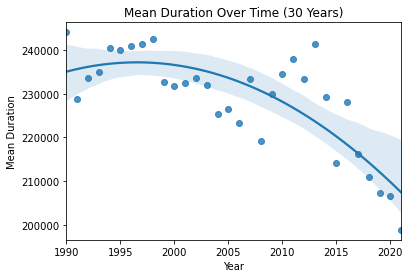

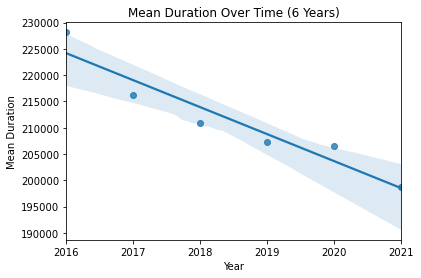

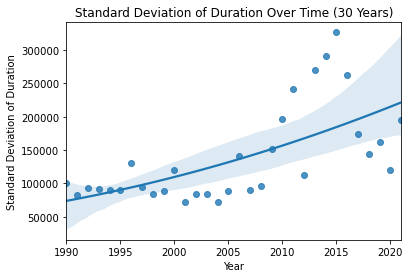

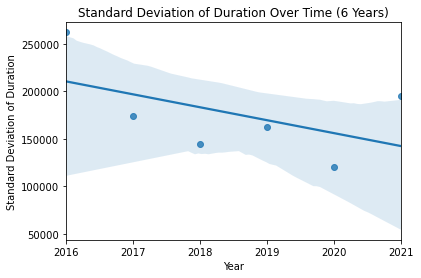

In [36]:
sns.regplot(data=recent_years_df, x="years", y="duration_ms", scatter = True, fit_reg = True, order = 2)
plt.xlabel("Year")
plt.ylabel("Mean Duration")
plt.title("Mean Duration Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="duration_ms", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Duration")
plt.title("Mean Duration Over Time (6 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="years", y="duration_stddev", scatter = True, fit_reg = True, order = 2)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Duration")
plt.title("Standard Deviation of Duration Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="duration_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Duration")
plt.title("Standard Deviation of Duration Over Time (6 Years)")
plt.show()

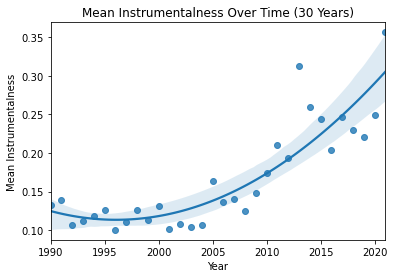

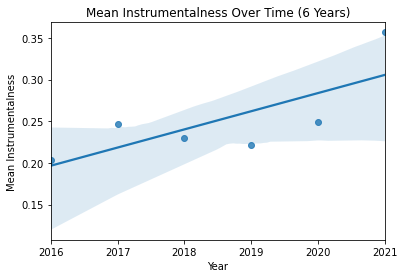

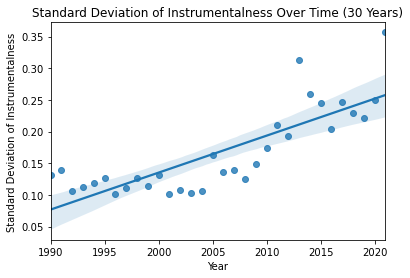

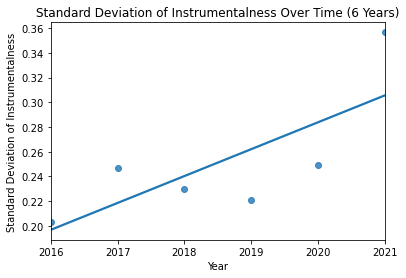

In [37]:
sns.regplot(data=recent_years_df, x="years", y="instrumentalness", scatter = True, fit_reg = True, order = 2)
plt.xlabel("Year")
plt.ylabel("Mean Instrumentalness")
plt.title("Mean Instrumentalness Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="instrumentalness", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Instrumentalness")
plt.title("Mean Instrumentalness Over Time (6 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="years", y="instrumentalness", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Instrumentalness")
plt.title("Standard Deviation of Instrumentalness Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="instrumentalness", scatter = True, fit_reg = True, order = 1, ci=0)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Instrumentalness")
plt.title("Standard Deviation of Instrumentalness Over Time (6 Years)")
plt.show()

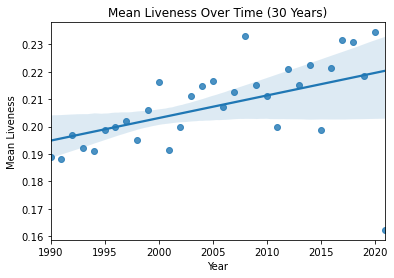

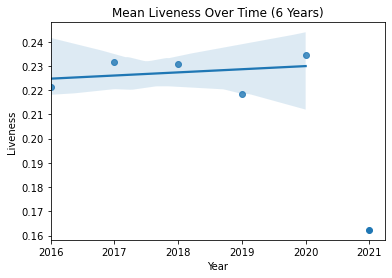

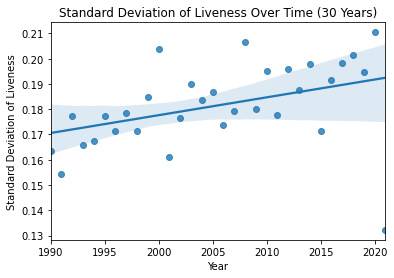

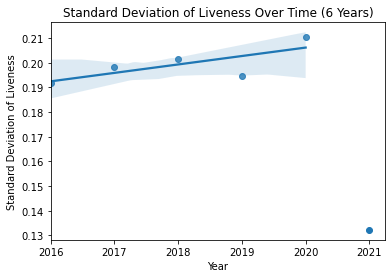

In [38]:
sns.regplot(data=recent_years_df, x="years", y="liveness", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Liveness")
plt.title("Mean Liveness Over Time (30 Years)")
plt.show()

sns.regplot(data=five_years_df, x="years", y="liveness", scatter = True, fit_reg = True, order = 1)
plt.scatter(x=twentytwentyone_df["years"], y=twentytwentyone_df["liveness"])
plt.xlabel("Year")
plt.ylabel("Liveness")
plt.title("Mean Liveness Over Time (6 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="years", y="liveness_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Liveness")
plt.title("Standard Deviation of Liveness Over Time (30 Years)")
plt.show()

sns.regplot(data=five_years_df, x="years", y="liveness_stddev", scatter = True, fit_reg = True, order = 1)
plt.scatter(x=twentytwentyone_df["years"], y=twentytwentyone_df["liveness_stddev"])
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Liveness")
plt.title("Standard Deviation of Liveness Over Time (6 Years)")
plt.show()

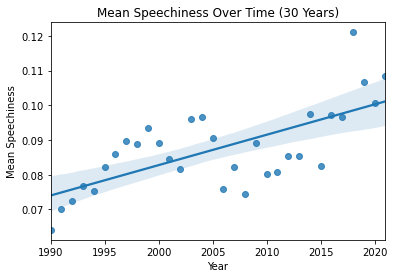

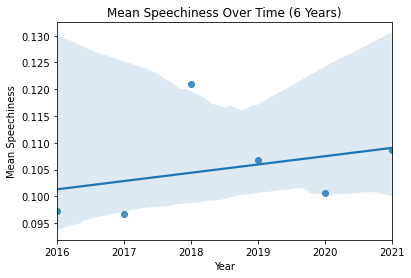

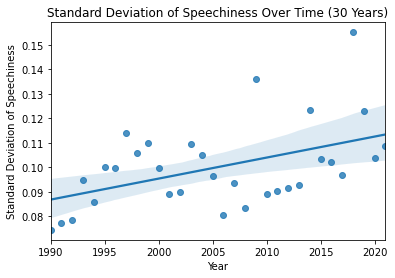

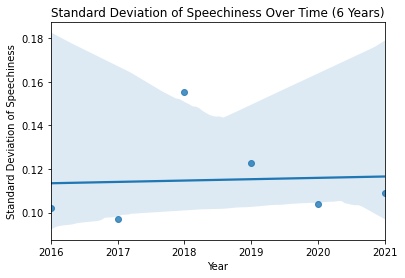

In [39]:
sns.regplot(data=recent_years_df, x="years", y="speechiness", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Speechiness")
plt.title("Mean Speechiness Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="speechiness", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Speechiness")
plt.title("Mean Speechiness Over Time (6 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="years", y="speechiness_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Speechiness")
plt.title("Standard Deviation of Speechiness Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="speechiness_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Speechiness")
plt.title("Standard Deviation of Speechiness Over Time (6 Years)")
plt.show()

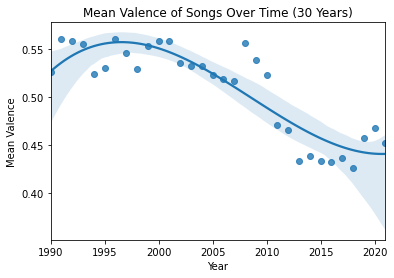

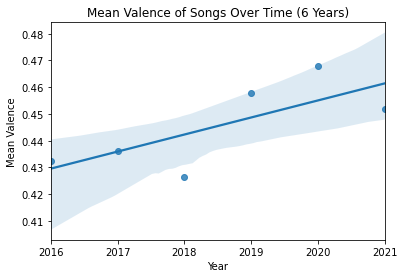

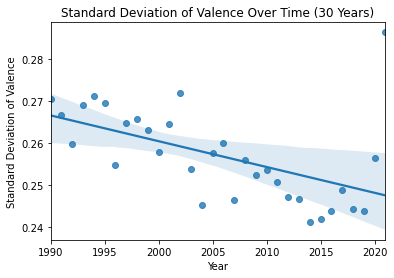

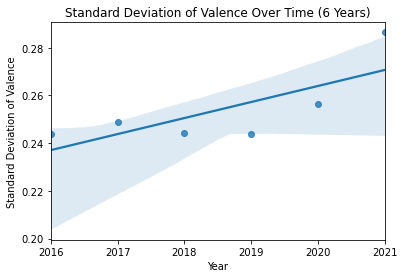

In [40]:
sns.regplot(data=recent_years_df, x="years", y="valence", scatter = True, fit_reg = True, order = 3)
plt.xlabel("Year")
plt.ylabel("Mean Valence")
plt.title("Mean Valence of Songs Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="valence", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Valence")
plt.title("Mean Valence of Songs Over Time (6 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="years", y="valence_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Valence")
plt.title("Standard Deviation of Valence Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="valence_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Valence")
plt.title("Standard Deviation of Valence Over Time (6 Years)")
plt.show()

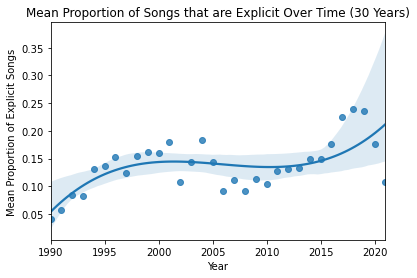

c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-p

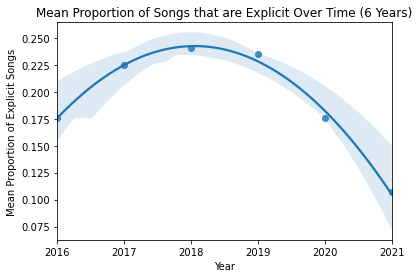

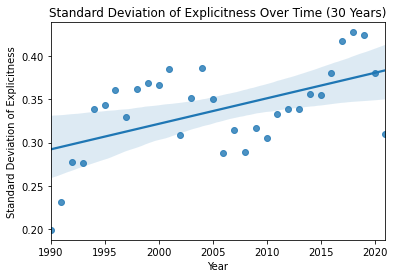

c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\luke\anaconda3\lib\site-p

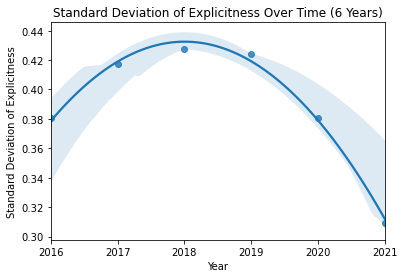

In [41]:
proportion_explicit = recent_years_df["explicit"]/recent_years_df["count"]
proportion_explicit_six = six_years_df["explicit"]/six_years_df["count"]

sns.regplot(data=recent_years_df, x="years", y=proportion_explicit, scatter = True, fit_reg = True, order = 3)
plt.xlabel("Year")
plt.ylabel("Mean Proportion of Explicit Songs")
plt.title("Mean Proportion of Songs that are Explicit Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y=proportion_explicit_six, scatter = True, fit_reg = True, order = 2)
plt.xlabel("Year")
plt.ylabel("Mean Proportion of Explicit Songs")
plt.title("Mean Proportion of Songs that are Explicit Over Time (6 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="years", y="explicit_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Explicitness")
plt.title("Standard Deviation of Explicitness Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="explicit_stddev", scatter = True, fit_reg = True, order = 2)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Explicitness")
plt.title("Standard Deviation of Explicitness Over Time (6 Years)")
plt.show()

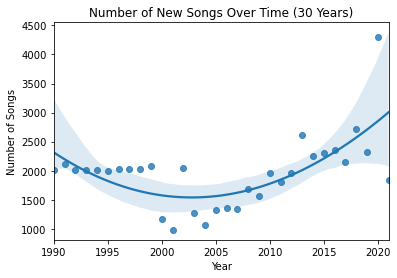

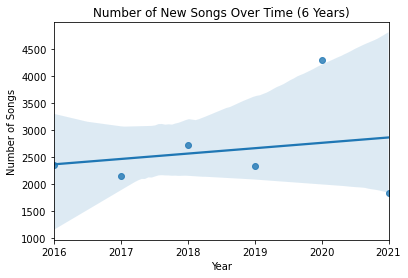

In [42]:
sns.regplot(data=recent_years_df, x="years", y="count", scatter = True, fit_reg = True, order = 3)
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Number of New Songs Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="count", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Number of New Songs Over Time (6 Years)")
plt.show()

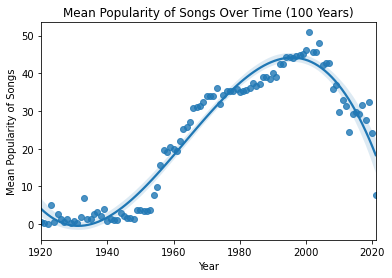

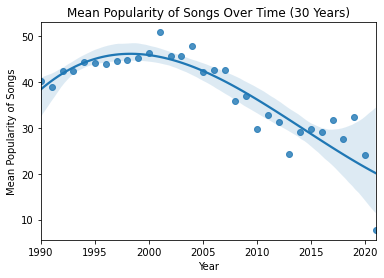

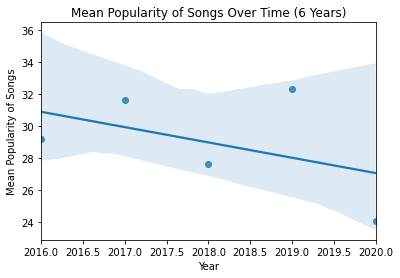

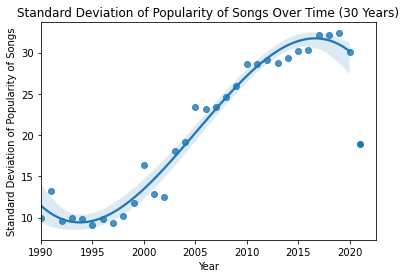

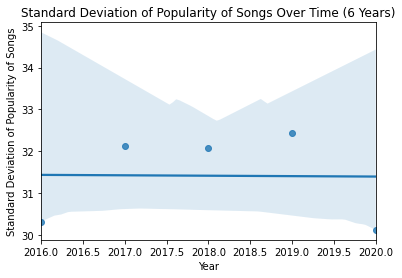

In [43]:
sns.regplot(data=all_years, x="years", y="popularity", scatter = True, fit_reg = True, order = 3)
plt.xlabel("Year")
plt.ylabel("Mean Popularity of Songs")
plt.title("Mean Popularity of Songs Over Time (100 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="years", y="popularity", scatter = True, fit_reg = True, order = 3)
plt.xlabel("Year")
plt.ylabel("Mean Popularity of Songs")
plt.title("Mean Popularity of Songs Over Time (30 Years)")
plt.show()

sns.regplot(data=five_years_df, x="years", y="popularity", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Popularity of Songs")
plt.title("Mean Popularity of Songs Over Time (6 Years)")
plt.show()

recent_years_temp = recent_years_df.drop(2021, axis = 0)
sns.regplot(data=recent_years_temp, x="years", y="popularity_stddev", scatter = True, fit_reg = True, order = 3)
plt.scatter(x=twentytwentyone_df["years"], y=twentytwentyone_df["popularity_stddev"])
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Popularity of Songs")
plt.title("Standard Deviation of Popularity of Songs Over Time (30 Years)")
plt.show()

sns.regplot(data=five_years_df, x="years", y="popularity_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Popularity of Songs")
plt.title("Standard Deviation of Popularity of Songs Over Time (6 Years)")
plt.show()

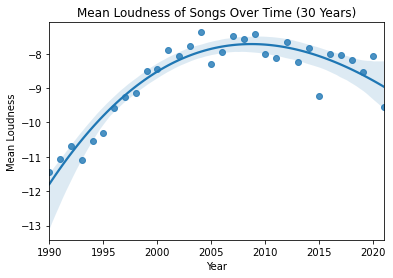

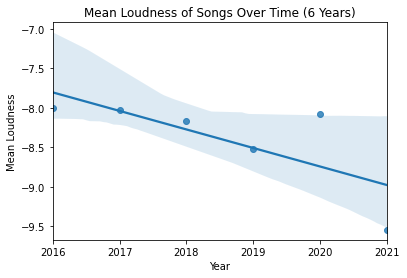

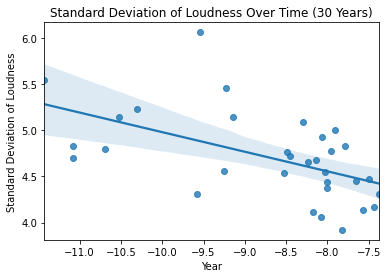

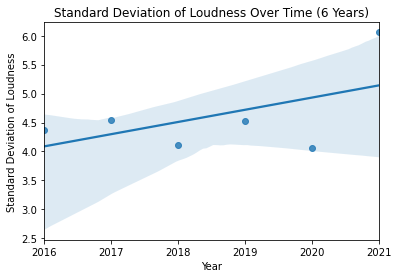

In [44]:
sns.regplot(data=recent_years_df, x="years", y="loudness", scatter = True, fit_reg = True, order = 3)
plt.xlabel("Year")
plt.ylabel("Mean Loudness")
plt.title("Mean Loudness of Songs Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="loudness", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Mean Loudness")
plt.title("Mean Loudness of Songs Over Time (6 Years)")
plt.show()

sns.regplot(data=recent_years_df, x="loudness", y="loudness_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Loudness")
plt.title("Standard Deviation of Loudness Over Time (30 Years)")
plt.show()

sns.regplot(data=six_years_df, x="years", y="loudness_stddev", scatter = True, fit_reg = True, order = 1)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Loudness")
plt.title("Standard Deviation of Loudness Over Time (6 Years)")
plt.show()